# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
### <p style="text-align: center;"> <b> Question 1: What makes song popular? </b></p>


---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents
1. [Question](#1-question) <br> 
    1.1 [The purpose of the question](#11-the-purpose-of-the-question)<br>
    1.2 [How to solve the question](#12-how-to-solve-the-question)
2. [Solution](#2-solution) <br>
    2.1 [Pre-processing data](#21-pre-processing-data)<br>
    2.2 [Data analysis](#22-data-analysis)<br>
    2.3 [Answer the question](#23-answer-the-question)<br>
---

## 1. Question

What makes song popular?

### 1.1 The purpose of the question

 There are numerous factors that can contribute to the creation of a good song that attracts millions of listeners. As producers or singers, if we are aware of these factors, they can be incredibly helpful in improving our approach to composing a song and the methods we use to do so.

### 1.2 How to solve the question

1. Factors(Attributes) from the most popular song of each year

2. Factors(Attributes) from the phases when the changing rate of streams was remarkable

3. Factors(Attributes) from the year which the average streams are the highest

## 2. Solution

### 2.0 Preparation

**📚 Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**📊 Get data**

In [2]:
df = pd.read_csv('./data/processed_spotify-2023.csv', encoding='ISO-8859-1')
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147.0,48.0,113.0,100.0,50.0
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


### 2.1 Pre-processing data

### 2.2 Data analysis

- Get number of songs released in each year

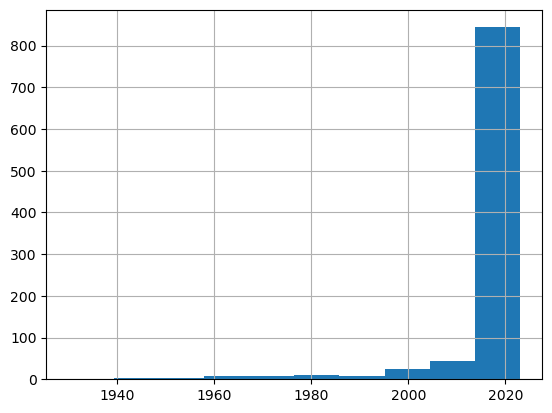

In [3]:
df['released_year'].hist();

🤔 In 21th century, people tend to hear music more. We can see the number of songs after 2000 increase significantly, indicating that music more and more comes closer to people's life and improve their life in positive ways. 

- **Most popular songs from 1930 to 2023**

In [4]:
released_years = sorted(list(df['released_year'].value_counts().index))
best_songs = {}

for year in released_years:
  songs = df[df['released_year'] == year]
  songs = songs.sort_values(by=['streams'], ascending=False)
  best_song = songs.iloc[0]
  best_songs[year] = best_song

best_songs_df = pd.DataFrame(best_songs)

best_songs_df.T[['track_name', 'streams']].sort_index(ascending=False)

,track_name,streams
2023,Flowers,1316855716.0
2022,As It Was,2513188493.0
2021,STAY (with Justin Bieber),2665343922.0
2020,Heat Waves,2557975762.0
2019,Blinding Lights,3703895074.0
2018,Someone You Loved,2887241814.0
2017,Shape of You,3562543890.0
2016,One Dance,2713922350.0
2015,Love Yourself,2123309722.0
2014,Thinking Out Loud,2280566092.0


- **Most popular songs of each year and their corresponding streams**

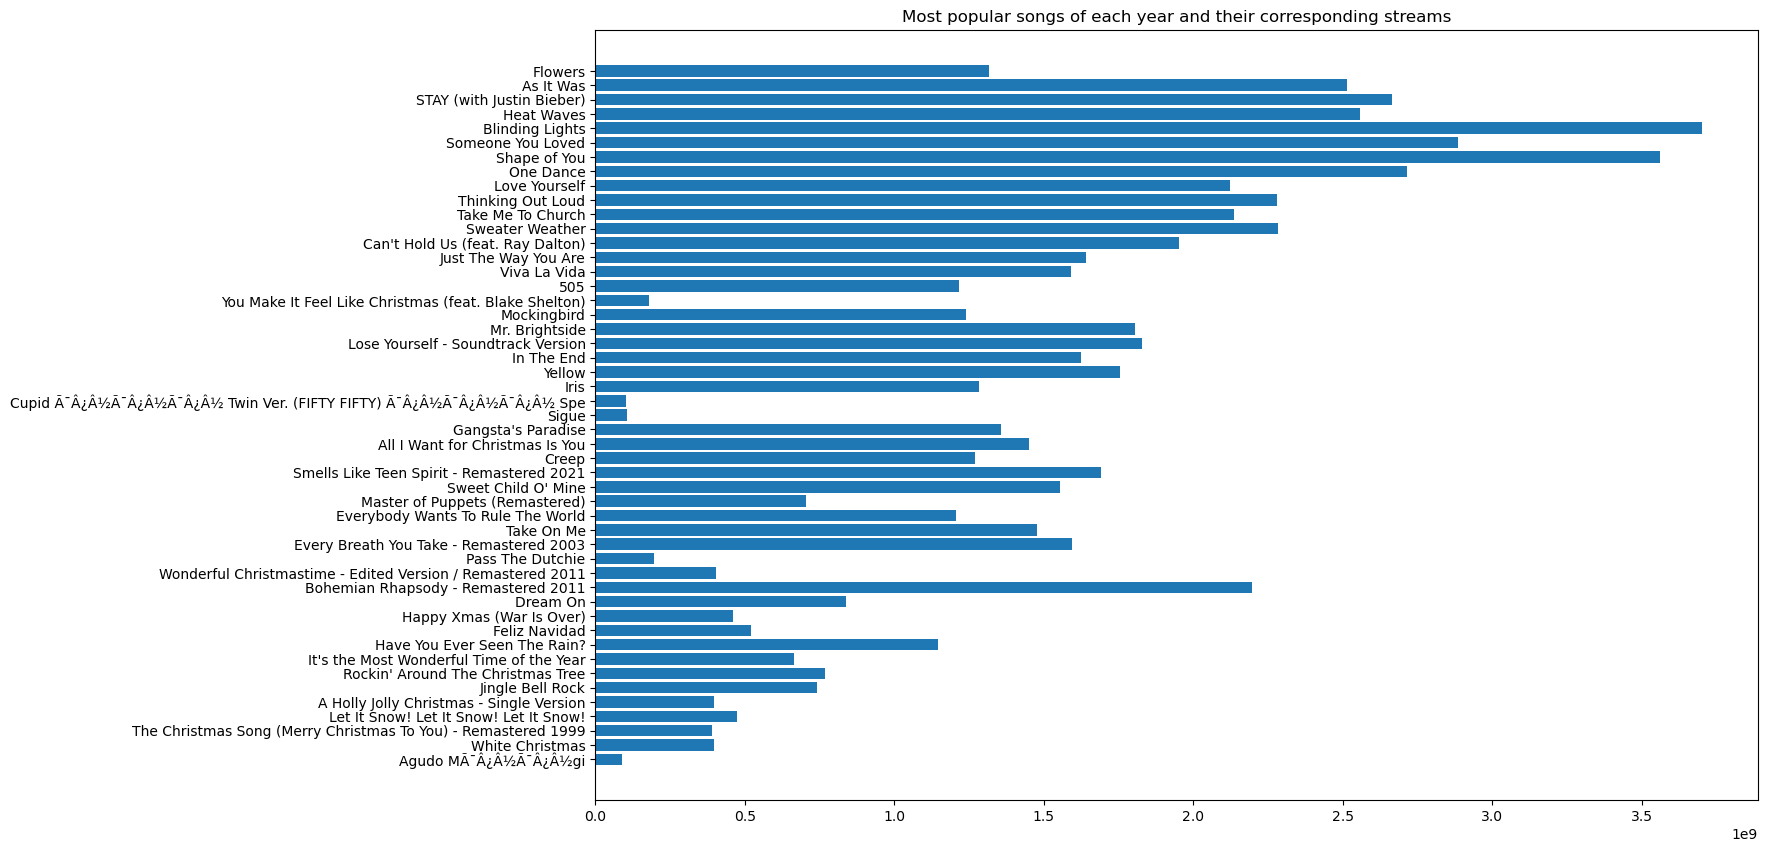

In [5]:
best_songs_name, best_songs_streams = best_songs_df.T['track_name'], best_songs_df.T['streams']
plt.figure(figsize=(15, 10))
plt.title('Most popular songs of each year and their corresponding streams')
plt.barh(best_songs_name, best_songs_streams);

- **Lowest/highest streams and corresponding year**

In [6]:
best_songs_streams[best_songs_streams == best_songs_streams.values.min()]

1930    90598517.0
Name: streams, dtype: object

In [7]:
best_songs_streams[best_songs_streams == best_songs_streams.values.max()]

2019    3703895074.0
Name: streams, dtype: object

- **The changing rate of streams of most popular songs in each year**

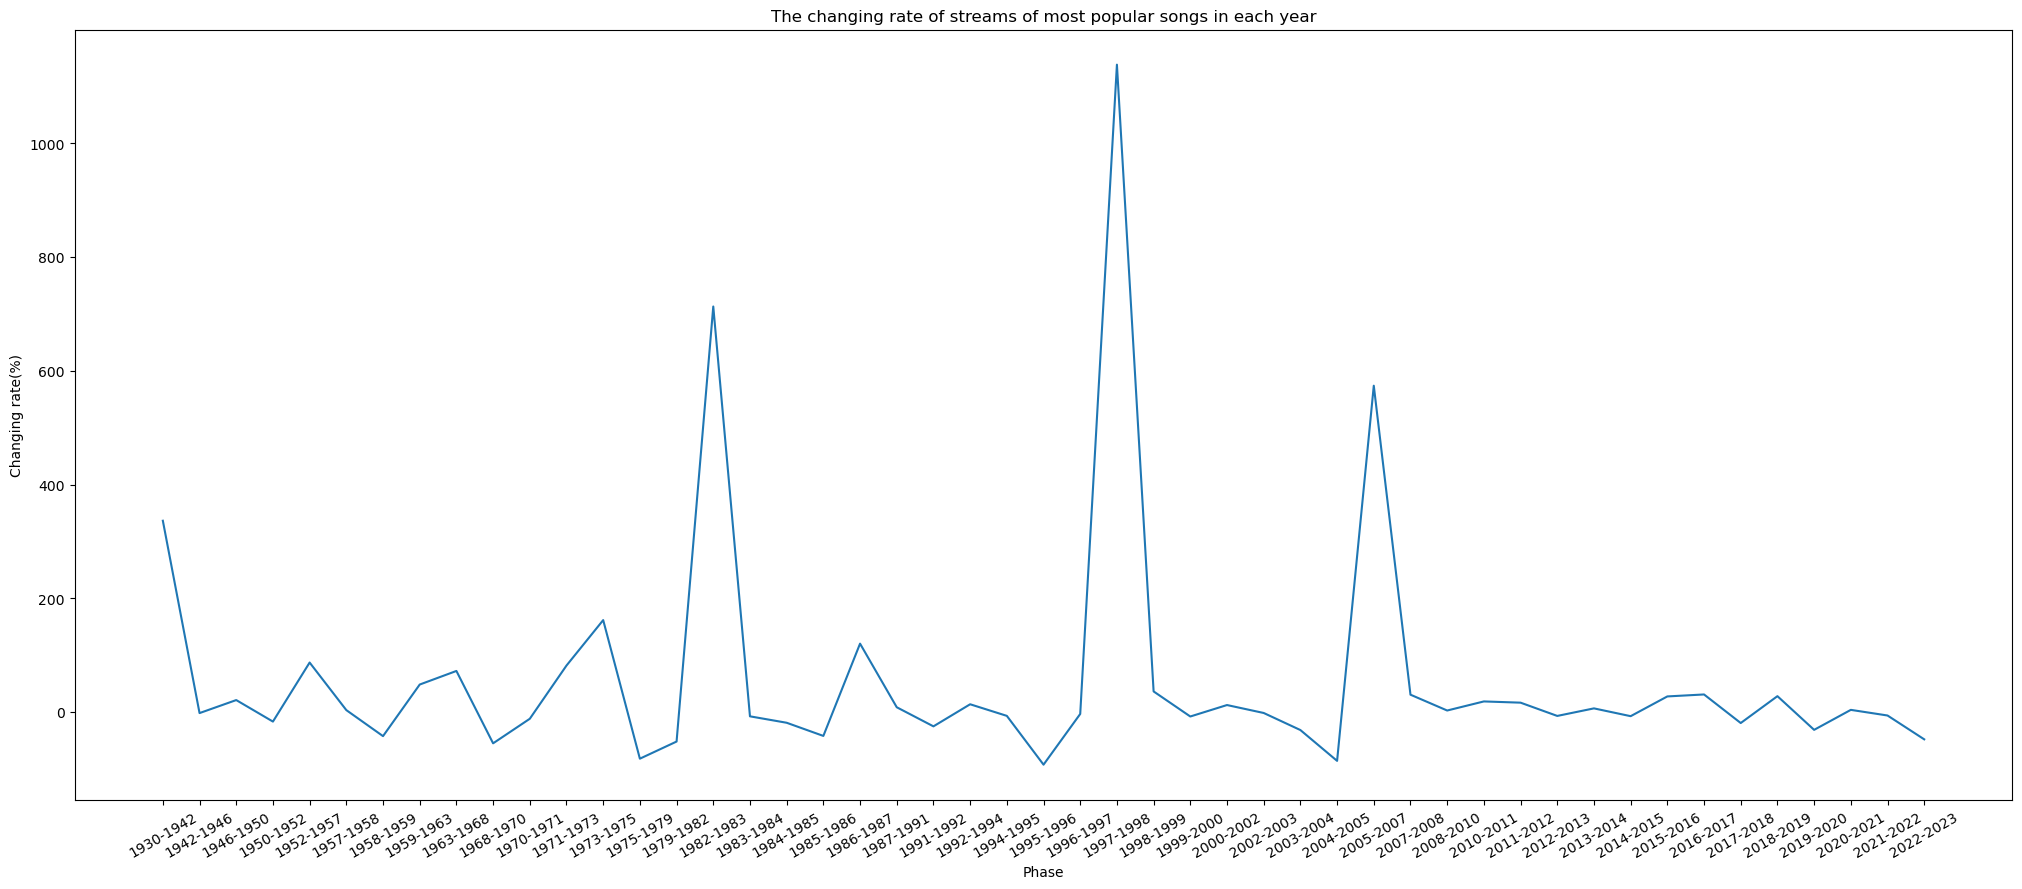

In [8]:
first = True
last_stream, last_year = None, None
changing_rate_df = {}

for year, stream in best_songs_streams.items():
  if first:
    first = False
    last_stream = stream
    last_year = year
    continue
  changing_rate_df[str(last_year) + '-' + str(year)] = (stream - last_stream) / last_stream * 100
  
  last_stream = stream
  last_year = year

changing_rate_df

plt.figure(figsize=(25, 10))
plt.xticks(rotation=30)
plt.ylabel('Changing rate(%)')
plt.xlabel('Phase')
plt.title('The changing rate of streams of most popular songs in each year')
plt.plot(changing_rate_df.keys(), changing_rate_df.values());

**Comments**:

- There 3 noticeable phases: **1982-1983, 1997-1998 and 2005-2007**



**The average streams of each years**

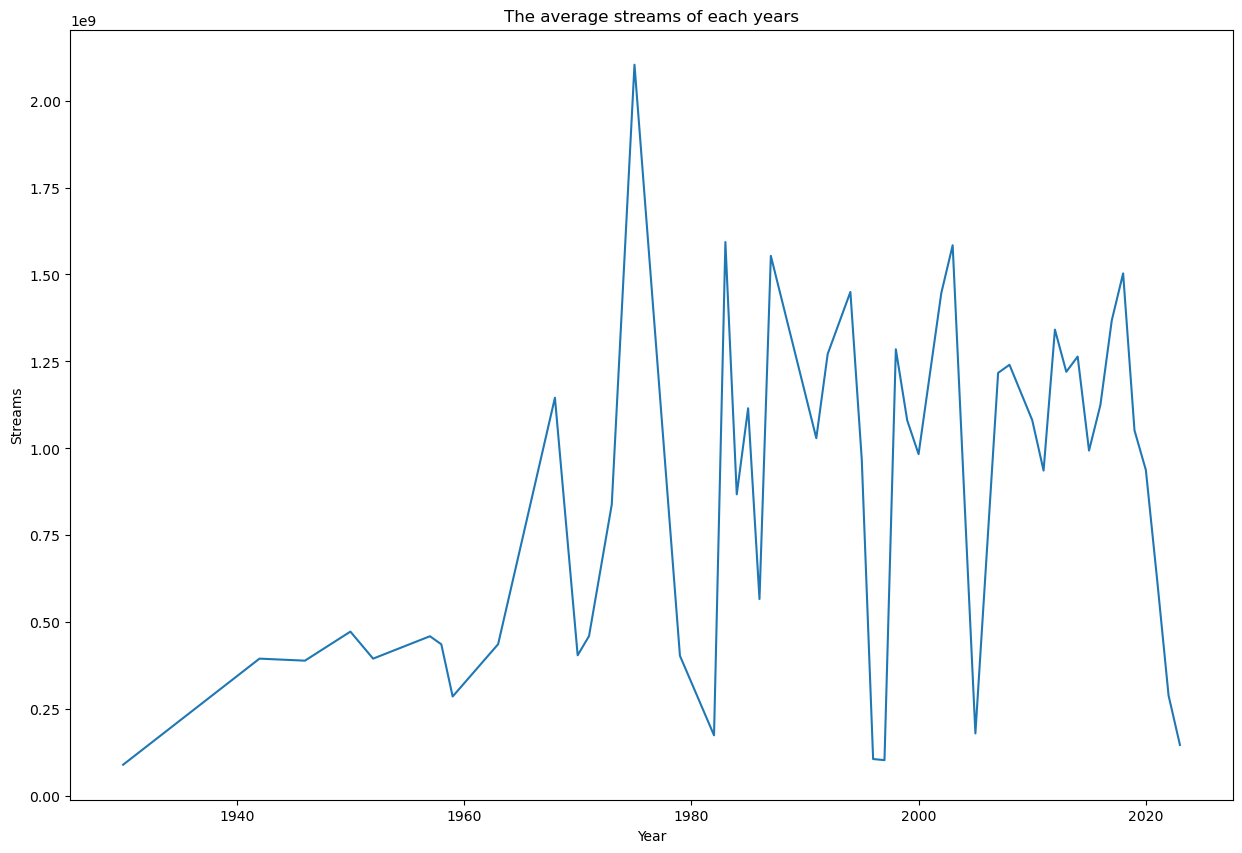

In [9]:
avg_stream_df = df[['released_year', 'streams']].groupby(by='released_year').mean()

plt.figure(figsize=(15, 10))
plt.title('The average streams of each years')
plt.xlabel('Year')
plt.ylabel('Streams')
plt.plot(avg_stream_df.index, avg_stream_df.values);

In [10]:
avg_stream_df['streams'].idxmax(), avg_stream_df['streams'].max()

(1975, 2103052676.0)

In [11]:
avg_stream_df['streams'].idxmin(), avg_stream_df['streams'].min()

(1930, 90598517.0)

**Comments**

- The chart tend to go up(some year it went down remarkably). Therefore, people expose to music more especially when we have some modern devices that help us access music more easily.
- The highest average streams is 2103052676.0 in 1975
0 
- The lowest average streams is 90598517.0 in 1930

**Best songs in spotify charts**

In [12]:
def top_10_songs_in_chart(name):
  return df[(df['released_year'] == 2023) & df[name] != 0][['track_name', name, 'streams']].sort_values(by=name)

spotify_best_songs = top_10_songs_in_chart('in_spotify_charts')
spotify_best_songs[['track_name']]

,track_name
254,Mejor Que Yo
228,Hummingbird (Metro Boomin & James Blake)
385,VIBE (feat. Jimin of BTS)
249,Oi Balde - Ao Vivo
340,Heaven
...,...
29,Dance The Night (From Barbie The Album)
17,What Was I Made For? [From The Motion Picture ...
2,vampire
12,Flowers


**Best songs on apple charts**

In [13]:
apple_best_songs = top_10_songs_in_chart('in_apple_charts')
apple_best_songs[['track_name']]

,track_name
304,SORRY NOT SORRY
381,I'm Not Here To Make Friends
142,"Gol Bolinha, Gol Quadrado 2"
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar)
247,CartÃ¯Â¿Â½Ã¯Â¿Â½o B
...,...
5,Sprinter
12,Flowers
6,Ella Baila Sola
17,What Was I Made For? [From The Motion Picture ...


**Best songs on deezer chart**

In [14]:
deezer_best_songs = top_10_songs_in_chart('in_deezer_charts')
deezer_best_songs[['track_name']]

,track_name
113,Mine (Taylor's Version)
210,Abcdario
209,Area Codes
30,Rush
201,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)"
...,...
17,What Was I Made For? [From The Motion Picture ...
13,Daylight
133,"Shakira: Bzrp Music Sessions, Vol. 53"
29,Dance The Night (From Barbie The Album)


**Best songs on shazam charts**

In [15]:
shazam_best_songs = top_10_songs_in_chart('in_shazam_charts')
shazam_best_songs[['track_name']]

,track_name
254,Mejor Que Yo
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar)
294,Rosa Pastel
298,Mas Rica Que Ayer
307,I Know - PR1SVX Edit
...,...
12,Flowers
24,Popular (with Playboi Carti & Madonna) - The I...
44,Barbie World (with Aqua) [From Barbie The Album]
17,What Was I Made For? [From The Motion Picture ...


**We will compare these best songs from different charts to see how their streams different from the others**

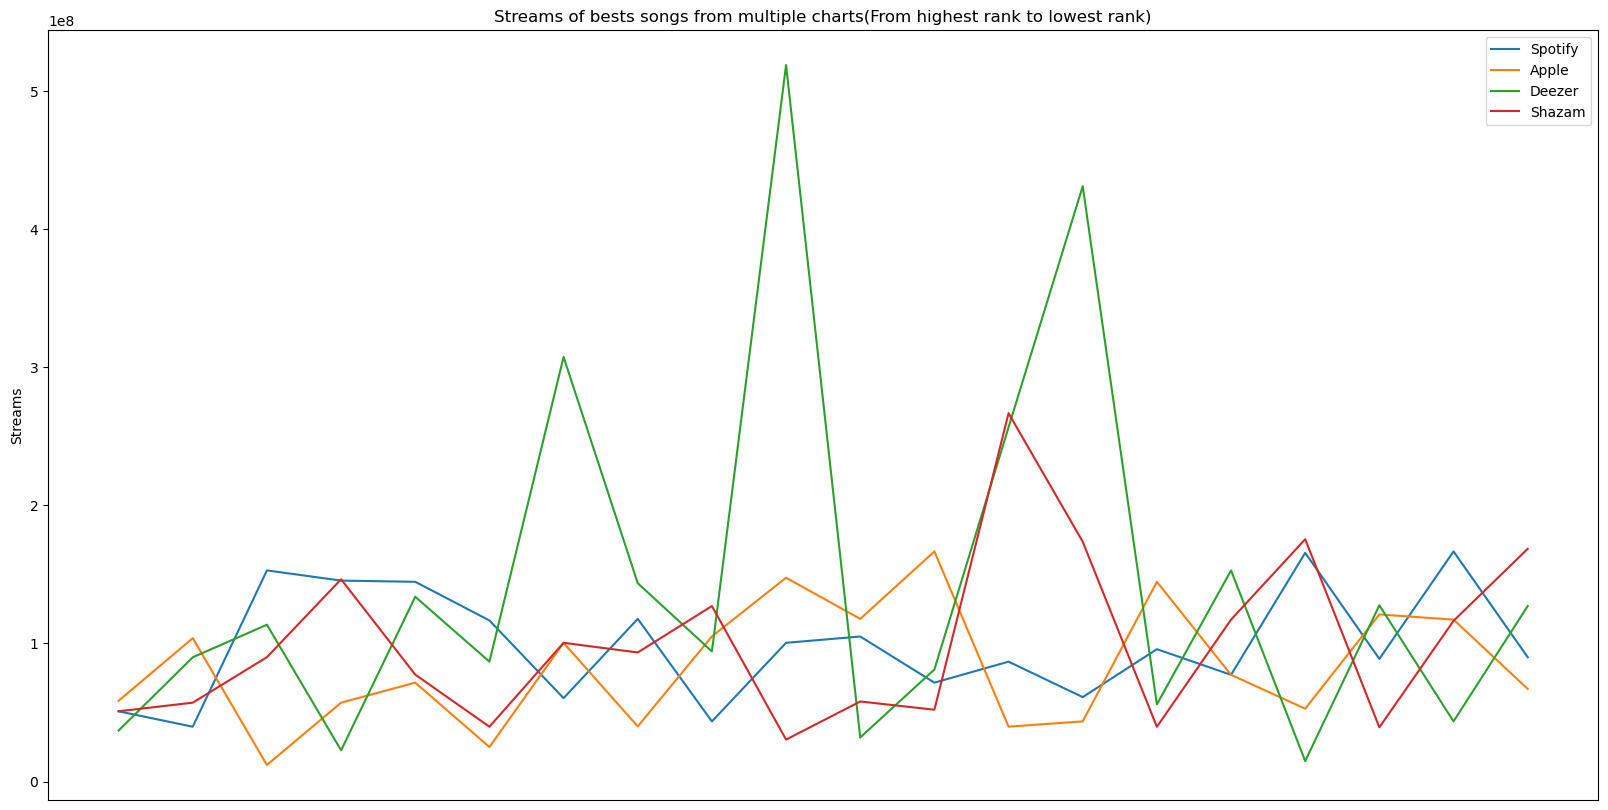

In [16]:
x = np.arange(1, 21)
plt.figure(figsize=(20, 10))

plt.plot(x, spotify_best_songs['streams'][:20], label='Spotify')
plt.plot(x, apple_best_songs['streams'][:20], label='Apple')
plt.plot(x, deezer_best_songs['streams'][:20], label='Deezer')
plt.plot(x, shazam_best_songs['streams'][:20], label='Shazam')

plt.title('Streams of bests songs from multiple charts(From highest rank to lowest rank)')
plt.tick_params(bottom = False) 
plt.xticks([])
plt.ylabel("Streams")
plt.legend()
plt.show();

**3 best songs from `Deezer` charts which has the remarkable streams**

In [17]:
deezer_best_songs[:20].sort_values('streams', ascending=False)[:3]

,track_name,in_deezer_charts,streams
49,Die For You - Remix,1.0,518745108.0
131,OMG,1.0,430977451.0
181,Fin de Semana,1.0,307370144.0


**Comments**

- Different platforms have different streams of bests songs. Some platforms the streams are more significant than the others(`Deezer`). 
- We can see most of the streams take place in `Deezer`
- The songs which has the highest rank does not mean that its stream will be the highest
- There are 3 songs in `Deezer` have the most streams compare to the bests songs from other platforms: 

  1. Die For You - Remix
  2. OMG 
  3. Fin de Semana

In [18]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

**Top 10 songs that appear most frequently in Spotify, Apple and Deezer playlist**


C:\Users\Nien\AppData\Local\Temp\ipykernel_1448\567517267.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_1448\567517267.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_1448\567517267.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_1448\567517267.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


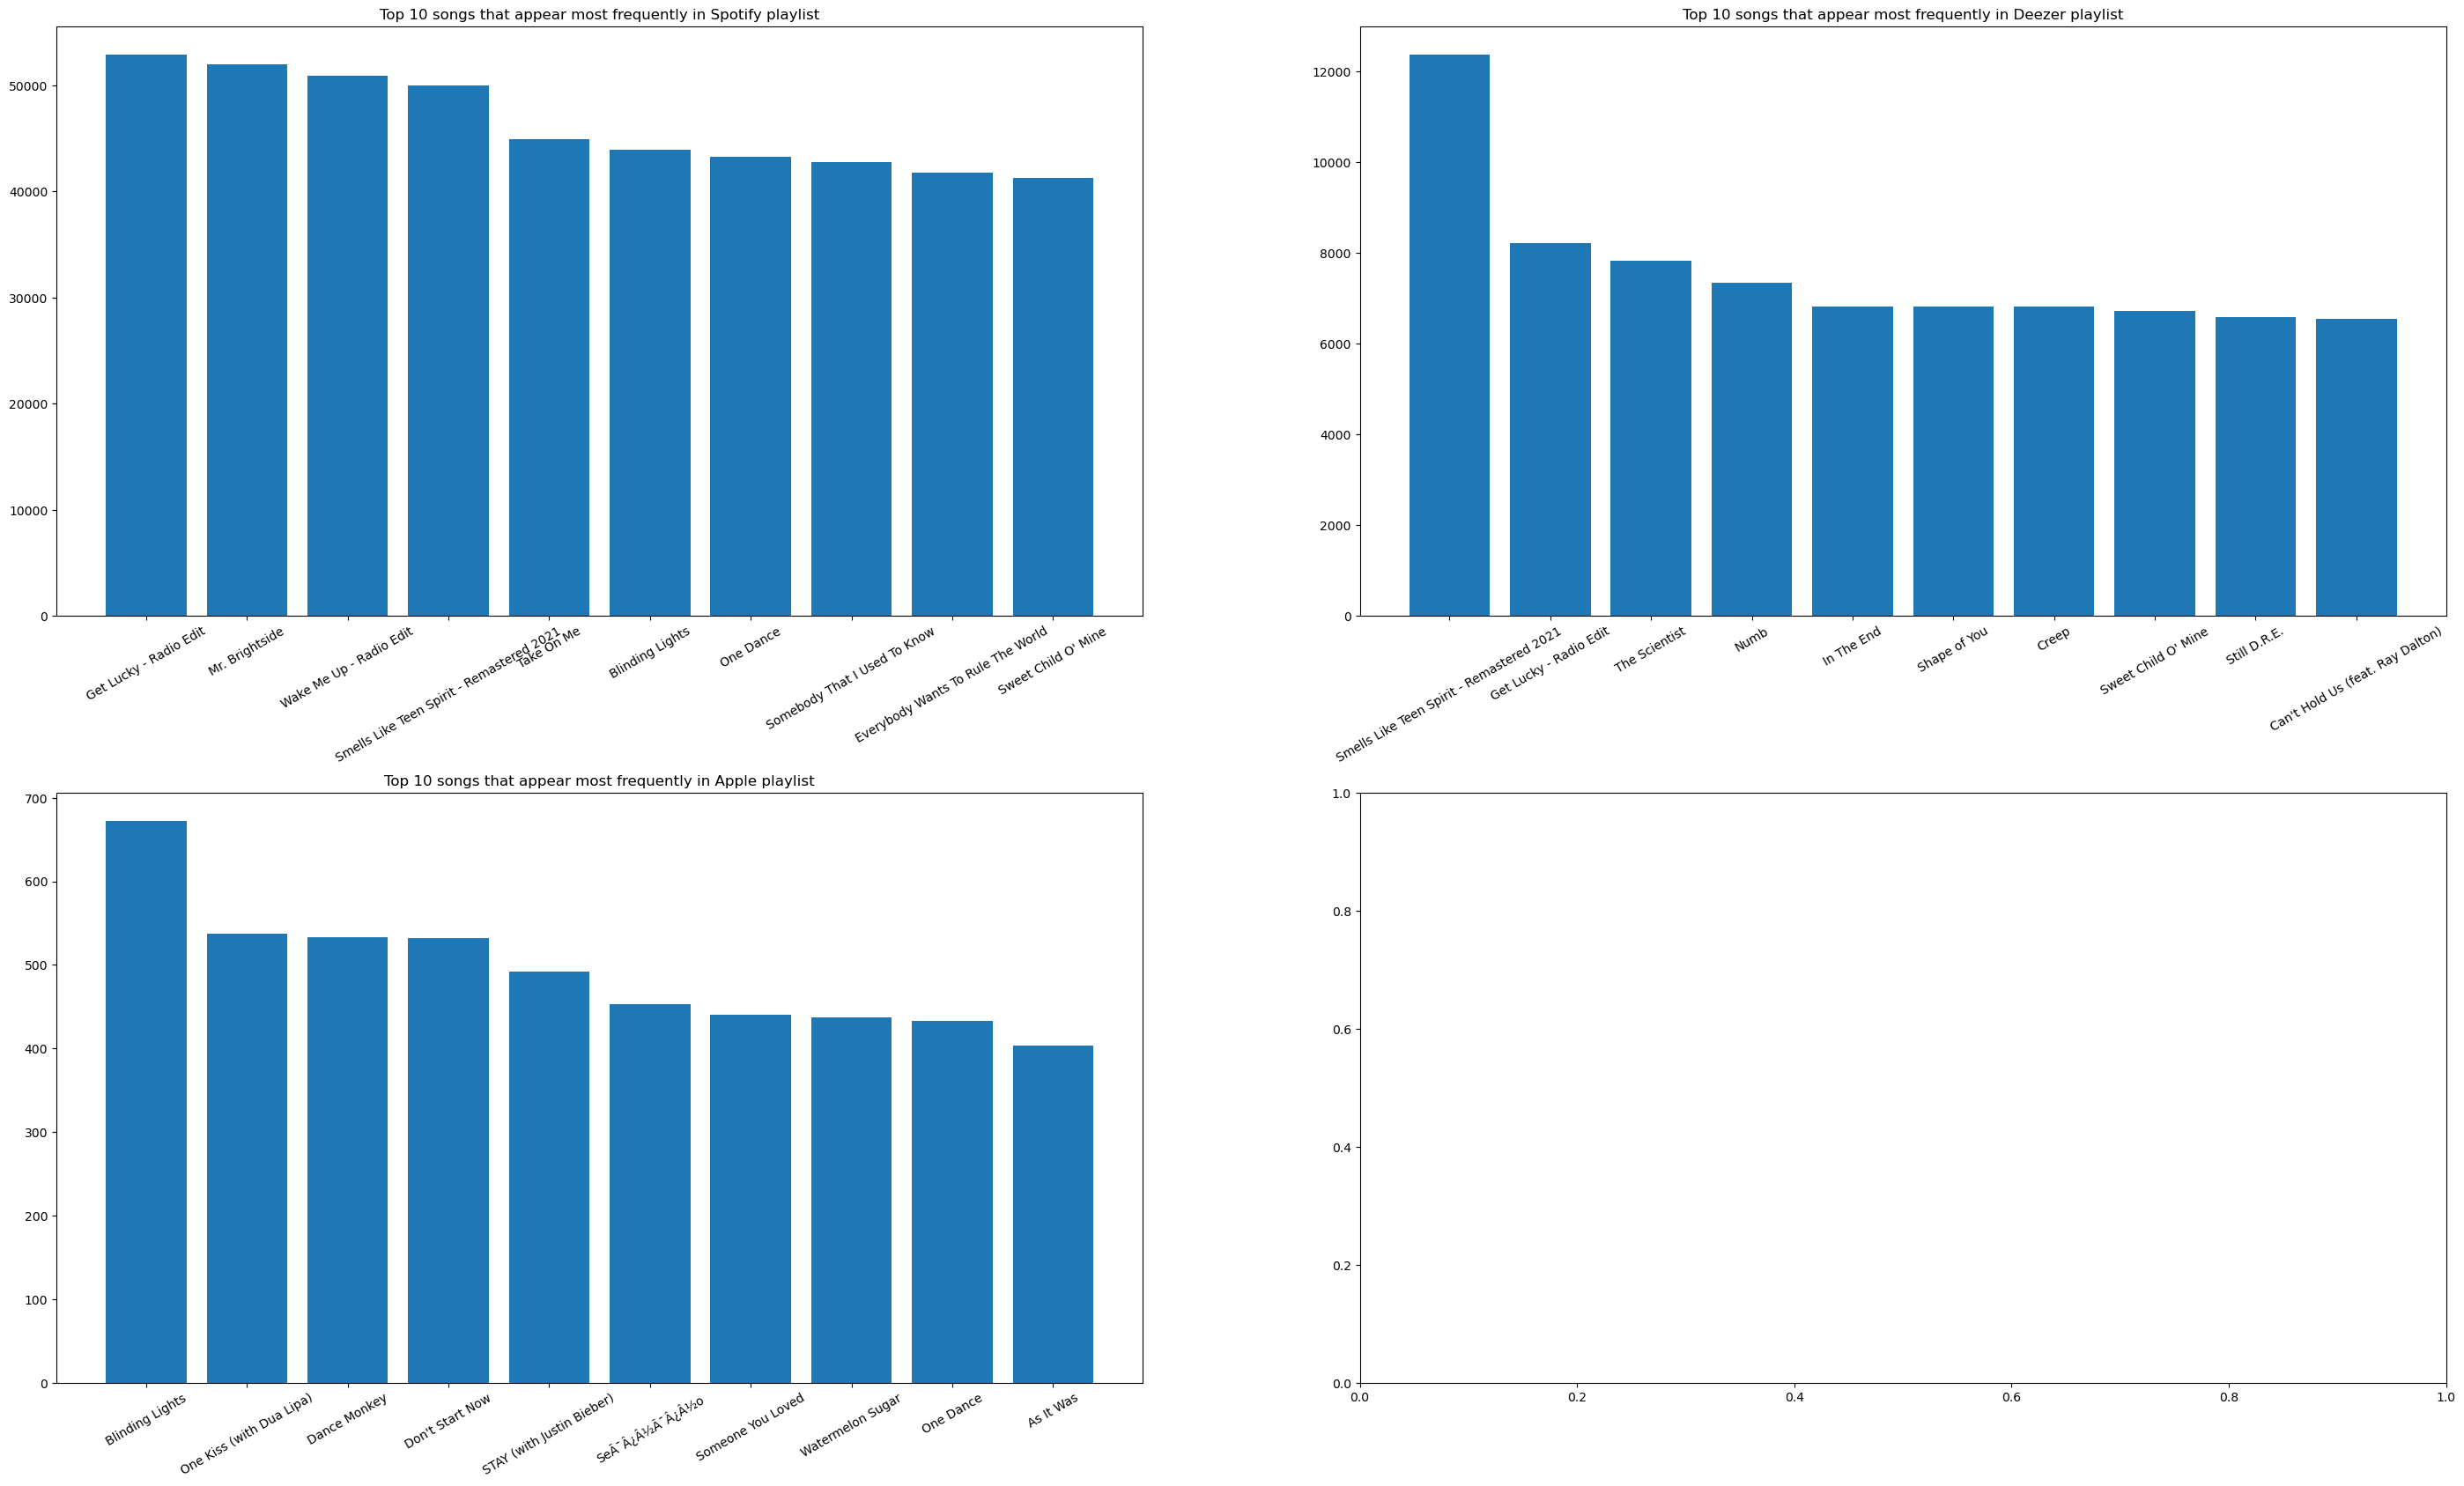

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(35, 20))

platforms = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']

count = 0
for platform in platforms:
  title = platform.split("_")[1]
  songs_df = df[['track_name', platform]].sort_values(by=platform, ascending=False)

  songs = songs_df['track_name']
  counts = songs_df[platform]
  axes[count//2][count%2].bar(songs[:10], counts[:10])
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
  axes[count//2][count%2].set_title('Top 10 songs that appear most frequently in ' + title.capitalize() + ' playlist')
  # axes[count].set_xticks(songs)
  # axes[count].set_ylabel('Number of playlists')
  # axes[count].set_xlabel('Name of song')
  # plt.title('Top 10 songs that appear most frequently in Spotify playlist')
  count += 1

fig.subplots_adjust(hspace=0.3)
fig.show();

📝 **Some insights**
- Some songs which is the most popular song in a year but its streams are very low(You Make It Fell Like Christmas, Cupid or Sigue,...)
- The streams is changing rapidly. Therefore, in some years, people tend to listen to music more than other years.
- The highest streams are 3703895074.0 in 2019: [Blinding Lights - The Weeknd](https://www.google.com/search?q=blinding+lights&rlz=1C1KNTJ_viVN977VN977&oq=blinding+lights&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTINCAEQABiDARixAxiABDINCAIQLhivARjHARiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDINCAYQLhivARjHARiABDIHCAcQABiABDIHCAgQABiABDINCAkQLhivARjHARiABNIBCDE1OTZqMGo0qAIAsAIA&sourceid=chrome&ie=UTF-8)
- The the lowest streams are 90598517.0 in 1930: Agudo...

### 2.3 Answer the question